<a href="https://colab.research.google.com/github/JSJeong-me/SEMICON-BigData/blob/main/statistics-ref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 통계적 가설검정

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

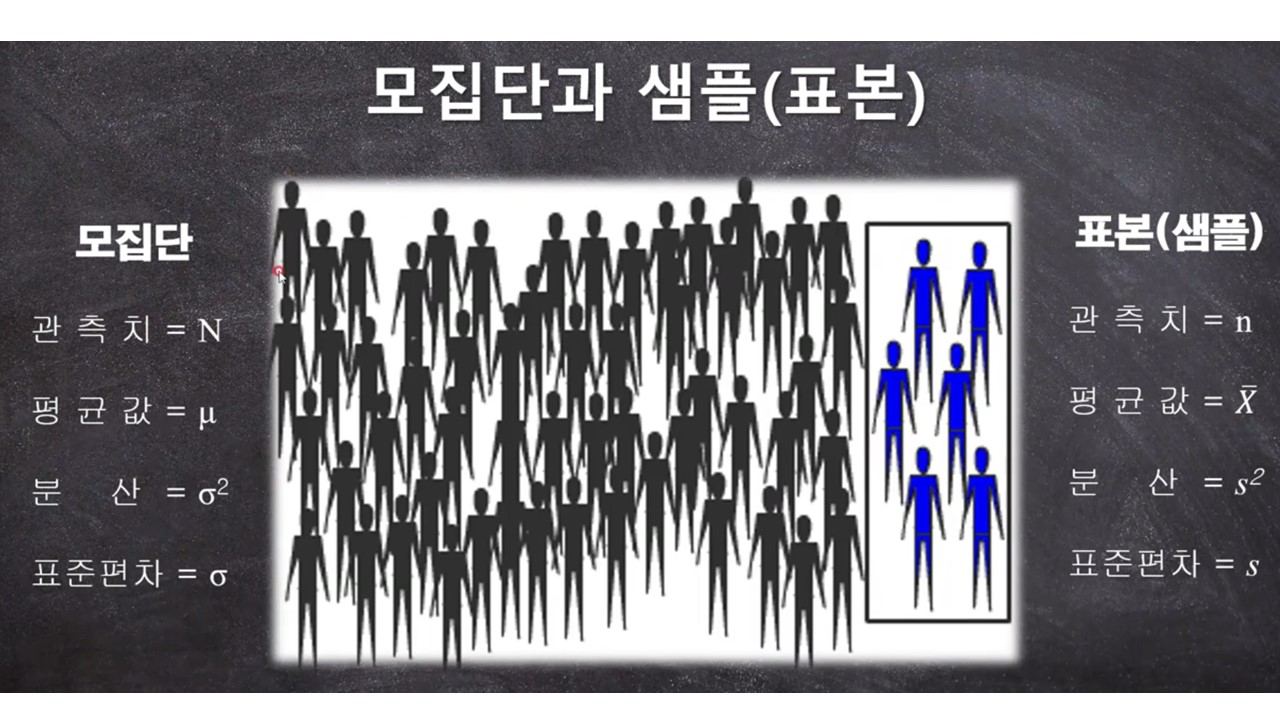

In [2]:
!pip install -U  jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

[I 14:46:36 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 14:46:36 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 14:46:36 InstallContribNbextensionsApp] Installing /home/ubuntu/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/printview -> printview
[I 14:46:36 InstallContribNbextensionsApp] Up to date: /home/lab02/.local/share/jupyter/nbextensions/printview/main.js
[I 14:46:36 InstallContribNbextensionsApp] Up to date: /home/lab02/.local/share/jupyter/nbextensions/printview/printview.yaml
[I 14:46:36 InstallContribNbextensionsApp] Up to date: /home/lab02/.local/share/jupyter/nbextensions/printview/icon.png
[I 14:46:36 InstallContribNbextensionsApp] Up to date: /home/lab02/.local/share/jupyter/nbextensions/printview/readme.md
[I 14:46:36 InstallContribNbextensionsApp] Up to date: /home/lab02/.local/share/jupyter/nbextensions/printview/printview-button.png

In [3]:
path = "./data/"

In [4]:
import pandas as pd

In [5]:
import pandas_profiling

In [6]:
df=pd.read_csv(path+'tips.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        241 non-null    float64
dtypes: float64(3), object(4)
memory usage: 13.5+ KB


In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [9]:
df['sex'] = df['sex'].replace({'Female':0,'Male':1})

In [10]:
df['smoker']=df['smoker'].replace({'No':0,'Yes':1})

In [11]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
df['day']=df['day'].replace({'Sun':0, 'Sat':1, 'Thur':2, 'Fri':3})

In [13]:
df['time']=df['time'].replace({'Lunch':0,'Dinner':1})

In [14]:
df['tip_rate']= df['tip']/df['total_bill']*100

In [15]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,241.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.098361,0.721311,2.556017,16.080258
std,8.902412,1.383638,0.479967,0.486667,0.933244,0.449276,0.947571,6.107220
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.563814
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.912736
50%,17.795000,2.900000,1.000000,0.000000,1.000000,1.000000,2.000000,15.476977
75%,24.127500,3.562500,1.000000,1.000000,2.000000,1.000000,3.000000,19.147549
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,71.034483


In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,0,1,2.0,5.944673
1,10.34,1.66,1,0,0,1,3.0,16.054159
2,21.01,3.50,1,0,0,1,3.0,16.658734
3,23.68,3.31,1,0,0,1,2.0,13.978041
4,24.59,3.61,0,0,0,1,4.0,14.680765


In [17]:
df.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df=pd.read_csv(path+'tips.csv')

In [19]:
tips_gb = df.groupby(['day','sex']).agg({'size':'sum'})

In [20]:
tips_gb

size
day  sex          
Fri  Female   19.0
     Male     21.0
Sat  Female   63.0
     Male    152.0
Sun  Female   49.0
     Male    160.0
Thur Female   79.0
     Male     73.0

In [21]:
tips_gb.stack()

day   sex         
Fri   Female  size     19.0
      Male    size     21.0
Sat   Female  size     63.0
      Male    size    152.0
Sun   Female  size     49.0
      Male    size    160.0
Thur  Female  size     79.0
      Male    size     73.0
dtype: float64

In [22]:
tips_gb

size
day  sex          
Fri  Female   19.0
     Male     21.0
Sat  Female   63.0
     Male    152.0
Sun  Female   49.0
     Male    160.0
Thur Female   79.0
     Male     73.0

In [23]:
tips_us = tips_gb.unstack()

In [24]:
tips_us

size       
sex  Female   Male
day               
Fri    19.0   21.0
Sat    63.0  152.0
Sun    49.0  160.0
Thur   79.0   73.0

In [25]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,241.000000
mean,19.785943,2.998279,2.556017
std,8.902412,1.383638,0.947571
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 카이제곱검정

In [26]:
!pwd

/home/lab02/AI-Convergence-Expert-Course-210812/01-lecture


In [27]:
ad_df = pd.read_csv(path+'data_chi.csv',  encoding='EUC-KR')

In [28]:
ad_df.index = ['1공장', '2공장', '3공장','4공장']

In [29]:
n = len(ad_df)
print(n)
ad_df.head()

4


,냉장고,세탁기,건조기
1공장,270,228,277
2공장,260,285,284
3공장,236,225,231
4공장,234,262,208


In [30]:
chi, pval, dof, expected = stats.chi2_contingency(ad_df)

In [31]:
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

chi-square test 
 chisq: 13.366
 p: 0.038
 degree pf freedom: 6
 expected value: 
[[258.333 258.333 258.333]
 [276.333 276.333 276.333]
 [230.667 230.667 230.667]
 [234.667 234.667 234.667]]


In [32]:
ad_cross = pd.crosstab(ad_df['냉장고'], ad_df['세탁기'])
ad_cross

세탁기,225,228,262,285
냉장고,,,,
234,0,0,1,0
236,1,0,0,0
260,0,0,0,1
270,0,1,0,0


In [33]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,
                                          correction=False)
chi2, p, dof

(12.0, 0.21330930508341653, 9)

In [34]:
ef

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])